#### Verdant Benjamin && Commandeur Nicolas
# INFO905 TP2 : MNIST

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import matplotlib as mpl
import matplotlib . pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)
mnist.target

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [3]:
#mnist.target = np.random.RandomState(seed=42).permutation(mnist.target)
#mnist.data = np.random.RandomState(seed=42).permutation(mnist.data)
# Autre façon de faire
p = np.random.permutation(len(mnist.target))
mnist.target = mnist.target[p]
mnist.data = mnist.data[p]

In [4]:
mnist.target

array([4, 6, 1, ..., 2, 4, 4], dtype=int8)

In [5]:
mnist_t_train, mnist_t_test = train_test_split(mnist.target, test_size=0.33, shuffle=False)
mnist_d_train, mnist_d_test = train_test_split(mnist.data, test_size=0.33, shuffle=False)
print(f"{len(mnist_t_test)} valeurs : {mnist_t_test}")
print(f"{len(mnist_d_test)} valeurs : {mnist_d_test}")

23100 valeurs : [1 7 6 ... 2 4 4]
23100 valeurs : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


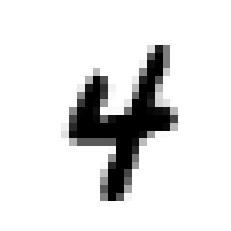

In [22]:
some_digit = mnist.data[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [11]:
X = mnist_d_train
Y = [i==1 for i in mnist_t_train]
for i in range(len(Y)):
    if Y[i] == True:
        print(f"{i} : {mnist_t_train[i]}")

2 : 1
5 : 1
16 : 1
18 : 1
24 : 1
58 : 1
66 : 1
91 : 1
95 : 1
100 : 1
106 : 1
108 : 1
115 : 1
133 : 1
146 : 1
196 : 1
199 : 1
208 : 1
227 : 1
229 : 1
231 : 1
242 : 1
243 : 1
253 : 1
265 : 1
274 : 1
276 : 1
277 : 1
287 : 1
312 : 1
315 : 1
318 : 1
324 : 1
329 : 1
336 : 1
349 : 1
353 : 1
366 : 1
372 : 1
384 : 1
410 : 1
411 : 1
412 : 1
428 : 1
434 : 1
435 : 1
449 : 1
451 : 1
452 : 1
453 : 1
457 : 1
465 : 1
467 : 1
472 : 1
474 : 1
482 : 1
494 : 1
517 : 1
534 : 1
545 : 1
550 : 1
558 : 1
585 : 1
589 : 1
605 : 1
606 : 1
615 : 1
621 : 1
627 : 1
628 : 1
637 : 1
638 : 1
645 : 1
648 : 1
655 : 1
672 : 1
678 : 1
683 : 1
693 : 1
701 : 1
708 : 1
728 : 1
747 : 1
748 : 1
757 : 1
772 : 1
773 : 1
787 : 1
793 : 1
797 : 1
799 : 1
801 : 1
804 : 1
806 : 1
812 : 1
814 : 1
819 : 1
835 : 1
858 : 1
860 : 1
875 : 1
908 : 1
933 : 1
953 : 1
959 : 1
965 : 1
980 : 1
984 : 1
987 : 1
998 : 1
1002 : 1
1004 : 1
1010 : 1
1012 : 1
1016 : 1
1022 : 1
1030 : 1
1039 : 1
1052 : 1
1057 : 1
1063 : 1
1077 : 1
1100 : 1
1109 : 1
1110 

8977 : 1
8978 : 1
8992 : 1
8993 : 1
8999 : 1
9000 : 1
9009 : 1
9040 : 1
9045 : 1
9052 : 1
9054 : 1
9056 : 1
9058 : 1
9077 : 1
9079 : 1
9092 : 1
9114 : 1
9126 : 1
9128 : 1
9129 : 1
9151 : 1
9153 : 1
9157 : 1
9176 : 1
9215 : 1
9216 : 1
9229 : 1
9233 : 1
9238 : 1
9250 : 1
9254 : 1
9255 : 1
9285 : 1
9287 : 1
9296 : 1
9303 : 1
9309 : 1
9310 : 1
9312 : 1
9316 : 1
9318 : 1
9330 : 1
9343 : 1
9361 : 1
9368 : 1
9376 : 1
9387 : 1
9396 : 1
9416 : 1
9420 : 1
9429 : 1
9460 : 1
9461 : 1
9463 : 1
9465 : 1
9476 : 1
9479 : 1
9487 : 1
9489 : 1
9499 : 1
9500 : 1
9504 : 1
9508 : 1
9514 : 1
9517 : 1
9519 : 1
9524 : 1
9538 : 1
9543 : 1
9545 : 1
9552 : 1
9556 : 1
9563 : 1
9567 : 1
9571 : 1
9583 : 1
9586 : 1
9592 : 1
9596 : 1
9601 : 1
9604 : 1
9605 : 1
9606 : 1
9611 : 1
9637 : 1
9639 : 1
9644 : 1
9645 : 1
9658 : 1
9663 : 1
9668 : 1
9671 : 1
9675 : 1
9693 : 1
9706 : 1
9713 : 1
9723 : 1
9736 : 1
9740 : 1
9746 : 1
9753 : 1
9754 : 1
9760 : 1
9761 : 1
9766 : 1
9771 : 1
9772 : 1
9778 : 1
9791 : 1
9801 : 1
9805 : 1
9

19670 : 1
19679 : 1
19680 : 1
19701 : 1
19708 : 1
19712 : 1
19713 : 1
19724 : 1
19725 : 1
19735 : 1
19739 : 1
19740 : 1
19764 : 1
19778 : 1
19779 : 1
19782 : 1
19787 : 1
19789 : 1
19802 : 1
19878 : 1
19906 : 1
19916 : 1
19929 : 1
19931 : 1
19942 : 1
19954 : 1
19956 : 1
19983 : 1
19994 : 1
20009 : 1
20017 : 1
20029 : 1
20033 : 1
20034 : 1
20035 : 1
20047 : 1
20054 : 1
20072 : 1
20079 : 1
20086 : 1
20087 : 1
20089 : 1
20091 : 1
20094 : 1
20131 : 1
20145 : 1
20157 : 1
20166 : 1
20170 : 1
20177 : 1
20193 : 1
20196 : 1
20198 : 1
20202 : 1
20231 : 1
20248 : 1
20256 : 1
20276 : 1
20285 : 1
20286 : 1
20290 : 1
20293 : 1
20294 : 1
20305 : 1
20313 : 1
20314 : 1
20318 : 1
20327 : 1
20337 : 1
20351 : 1
20379 : 1
20391 : 1
20397 : 1
20403 : 1
20404 : 1
20414 : 1
20427 : 1
20432 : 1
20469 : 1
20473 : 1
20483 : 1
20494 : 1
20502 : 1
20505 : 1
20507 : 1
20518 : 1
20542 : 1
20549 : 1
20561 : 1
20569 : 1
20570 : 1
20574 : 1
20577 : 1
20580 : 1
20589 : 1
20591 : 1
20603 : 1
20606 : 1
20607 : 1
20615 : 1


28684 : 1
28702 : 1
28709 : 1
28717 : 1
28719 : 1
28746 : 1
28757 : 1
28762 : 1
28773 : 1
28795 : 1
28813 : 1
28834 : 1
28854 : 1
28863 : 1
28878 : 1
28892 : 1
28901 : 1
28903 : 1
28931 : 1
28935 : 1
28936 : 1
28951 : 1
28954 : 1
28955 : 1
28968 : 1
28978 : 1
28980 : 1
28985 : 1
29014 : 1
29025 : 1
29032 : 1
29044 : 1
29057 : 1
29060 : 1
29066 : 1
29077 : 1
29097 : 1
29104 : 1
29109 : 1
29113 : 1
29114 : 1
29119 : 1
29135 : 1
29146 : 1
29151 : 1
29156 : 1
29158 : 1
29163 : 1
29198 : 1
29199 : 1
29201 : 1
29203 : 1
29224 : 1
29234 : 1
29238 : 1
29246 : 1
29254 : 1
29261 : 1
29280 : 1
29301 : 1
29309 : 1
29333 : 1
29352 : 1
29360 : 1
29371 : 1
29373 : 1
29379 : 1
29390 : 1
29412 : 1
29435 : 1
29442 : 1
29446 : 1
29448 : 1
29472 : 1
29500 : 1
29505 : 1
29546 : 1
29554 : 1
29560 : 1
29561 : 1
29567 : 1
29570 : 1
29572 : 1
29583 : 1
29584 : 1
29604 : 1
29635 : 1
29640 : 1
29642 : 1
29660 : 1
29667 : 1
29671 : 1
29680 : 1
29684 : 1
29685 : 1
29687 : 1
29694 : 1
29697 : 1
29699 : 1
29700 : 1


38460 : 1
38465 : 1
38468 : 1
38469 : 1
38473 : 1
38476 : 1
38480 : 1
38485 : 1
38497 : 1
38505 : 1
38509 : 1
38512 : 1
38514 : 1
38520 : 1
38532 : 1
38538 : 1
38541 : 1
38587 : 1
38593 : 1
38612 : 1
38618 : 1
38619 : 1
38622 : 1
38653 : 1
38655 : 1
38656 : 1
38657 : 1
38679 : 1
38684 : 1
38692 : 1
38726 : 1
38744 : 1
38745 : 1
38747 : 1
38753 : 1
38755 : 1
38779 : 1
38789 : 1
38799 : 1
38803 : 1
38805 : 1
38809 : 1
38824 : 1
38831 : 1
38833 : 1
38834 : 1
38840 : 1
38848 : 1
38850 : 1
38872 : 1
38891 : 1
38919 : 1
38933 : 1
38934 : 1
38953 : 1
38965 : 1
38967 : 1
39001 : 1
39011 : 1
39019 : 1
39053 : 1
39064 : 1
39096 : 1
39122 : 1
39126 : 1
39131 : 1
39146 : 1
39148 : 1
39149 : 1
39162 : 1
39236 : 1
39259 : 1
39291 : 1
39292 : 1
39305 : 1
39310 : 1
39316 : 1
39327 : 1
39329 : 1
39338 : 1
39339 : 1
39345 : 1
39352 : 1
39359 : 1
39364 : 1
39381 : 1
39389 : 1
39391 : 1
39396 : 1
39408 : 1
39425 : 1
39432 : 1
39451 : 1
39453 : 1
39454 : 1
39474 : 1
39491 : 1
39495 : 1
39524 : 1
39528 : 1
